In [2]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [3]:
import os
myCmd1_ = 'g++ __main__.cpp -o a'
myCmd1 = 'g++ __main__.cpp annexes.cpp grille.cpp joueur.cpp -o a'
myCmd2 = './a'

In [4]:
def sci(x):
    if (np.ceil(np.log10(x)) == 1):
        return round(x,2)
    elif (np.ceil(np.log10(x)) == 2):
        return round(x,1)
    else:
        return ("{:0.2e}".format(x))

def sci_s(x):
    if (np.ceil(np.log10(x)) == 1):
        return str(round(x,2))
    elif (np.ceil(np.log10(x)) == 2):
        return str(round(x,1))
    else:
        return str("{:0.2e}".format(x))

In [84]:
def afficheHisto_1data(string):   #Prend en argument 1 liste de scores
    data = np.loadtxt(string, delimiter = ' ')
    N = np.shape(data[:,0])[0]
    gagnant = data[:,2]
    labels, counts = np.unique(gagnant, return_counts=True)
    plt.bar(labels, counts, align='center', color = "orange")
    #plt.hist(gagnant, color="orange", bins=3)
    plt.xticks([0, 1, 2],["Egalité", "Blanc", "Noir"])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    print("Nombre d'égalité, de victoires de blanc, de victoires de noir : ", counts)
    print("Pourcentage d'égalité, de victoires de blanc, de victoires de noir : ", counts/N*100)
    dx = 0.3
    plt.text(0-dx,1/2*counts[0], str(counts[0]) + ' (' + str(round(counts[0]/N*100,2)) + '%)')
    plt.text(1-dx,1/2*counts[1], str(counts[1]) + ' (' + str(round(counts[1]/N*100,2)) + '%)')
    plt.text(2-dx,1/2*counts[2], str(counts[2]) + ' (' + str(round(counts[2]/N*100,2)) + '%)')
    plt.axhline(y = (N-counts[0])/2, xmin=0, xmax=3, c="darkred", linestyle="dashed") 

In [118]:
def afficheHisto_moy(moy, std, str_jA, str_jB, N):   #Prend en argument une moyenne de scores
    plt.bar([0, 1, 2], moy, align='center', color = "orange")
    plt.xticks([0, 1, 2],["Egalité", str_jA, str_jB])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    #print("Nombre d'égalité, de victoires de blanc, de victoires de Noir en moyenne: ", moy)
    dx = 0.3
    plt.text(0-dx,1/2*moy[0], str(round(moy[0],1)) + ' (' + str(round(moy[0]/N*100,1)) + '%)')
    plt.text(1-dx,1/2*moy[1], str(round(moy[1],1)) + ' (' + str(round(moy[1]/N*100,1)) + '%)')
    plt.text(2-dx,1/2*moy[2], str(round(moy[2],1)) + ' (' + str(round(moy[2]/N*100,1)) + '%)')
    for i in range(3):
        plt.axhline(y = moy[i]+std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c="grey", linestyle="dashed")
        plt.axhline(y = moy[i]-std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c="grey", linestyle="dashed")
    plt.axhline(y = (N-moy[0])/2, xmin=0, xmax=3, c="darkred", linestyle="dashed", label="$N_{jA}^{vict} = N_{jB}^{vict}$")
    plt.legend()
    
def stats(string):   #Moyenne sur 100 sets de 1000 data
    data = np.loadtxt(string, delimiter = ' ')
    nbVict = np.zeros((100,3))    #nbVictoires, dim 100
    for i in range(100):
        gagnant = data[i*1000 : (i+1)*1000, 2]
        nbVict[i][0] = np.sum(gagnant == 0)
        nbVict[i][1] = np.sum(gagnant == 1)
        nbVict[i][2] = np.sum(gagnant == 2)
    afficheHisto_moy(np.mean(nbVict, axis=0), np.std(nbVict, axis=0), "Blanc", "Noir", 1000)
    
def stats_50(string, str_jA, str_jB):   #Moyenne sur 100 sets de 1000 data, qd 50% blanc - 50% noir
    data = np.loadtxt(string, delimiter = ' ')
    nbVict = np.zeros((100,3))    #nbVictoires, dim 100
    for i in range(100):
        gagnant = data[i*1000 : (i+1)*1000, 2]
        nbVict[i][0] = np.sum(gagnant == 0)
        nbVict[i][1] = np.sum(gagnant[:500] == 1)      #Vict de joueur A (est blanc sur 500 premiers puis noir sur les 500 suivants)
        nbVict[i][2] = np.sum(gagnant[:500] == 2)      #Vict de joueur B
        nbVict[i][1] += np.sum(gagnant[500:] == 2)      #Vict de joueur A 
        nbVict[i][2] += np.sum(gagnant[500:] == 1)      #Vict de joueur B
    afficheHisto_moy(np.mean(nbVict, axis=0), np.std(nbVict, axis=0), str_jA, str_jB, 1000)

In [12]:
def stats1(N):    #fait une moyenne sur N listes du nb de victoires B/N
    print("Nombre de set de parties sur lequel on moyenne: ", N)
    nbVict = np.zeros((N,3))   # tableau du nb de vict pour chaque set de data 
    for i in range(N):         # (0 = egalité, 1 = blanc, 2 = noir)
        os.system(myCmd1)
        os.system(myCmd2)
        data = np.loadtxt("resultats.dat", delimiter = ' ')   #[scoreB, scoreN, gagnant]
        gagnant = data[:,2]
        nbVict[i][0] = np.sum(gagnant == 0)
        nbVict[i][1] = np.sum(gagnant == 1)
        nbVict[i][2] = np.sum(gagnant == 2)
        
    afficheHisto_moy(np.mean(nbVict, axis=0), np.std(nbVict, axis=0), N)
    #print(np.std(nbEgalite), np.std(nbVictB), np.std(nbVictN))

In [130]:
from scipy.optimize import curve_fit

def model(x, a, sigma, mu):
    return a * (1/(sigma*np.sqrt(2*np.pi))) * np.exp(- (x-mu)*(x-mu)/(2*sigma*sigma))

def gaussienne(string, str_jA):      #affiche la distrib gaussienne du score de blanc 
    data = np.loadtxt(string, delimiter = ' ')   #[scoreB, scoreN, gagnant]
    N = np.shape(data[:,0])[0]
    scorejA = data[:,1]
    labels, counts = np.unique(scorejA, return_counts=True)
    print(labels, counts)
    xdata = labels
    ydata = counts
    popt, pcov = curve_fit(model, xdata, ydata, p0 = (1,1,30))  #popt renvoie les paramètres optimisés
    x = np.linspace(np.min(labels),np.max(labels),1000)
    plt.scatter(xdata,ydata, s=1)
    plt.plot(x, model(x, *popt), c="orange", label = r"y = $a\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$")
    plt.xlabel("Score de " + str_jA)
    plt.ylabel("Nombre de parties")
    plt.title(r"(a,$\sigma,\mu$) = (" + sci_s(popt[0]) + ', ' + sci_s(popt[1]) + ', ' + sci_s(popt[2]) + ')')
    ytext = np.max(ydata) - N/200
    #plt.text(5, ytext, r"y = $a\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$")
    #plt.text(38, ytext, r"(a,$\sigma,\mu$) = (" + sci_s(popt[0]) + ', ' + sci_s(popt[1]) + ', ' + sci_s(popt[2]) + ')', size=8)
    plt.legend()
    

Comparaison des algorithmes

1) Aléatoire VS Aléatoire

1.1) Noir VS blanc

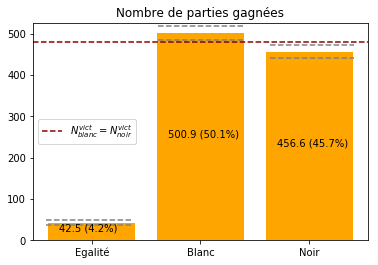

In [54]:
#os.system(myCmd1)
#os.system(myCmd2)

stats("data/alea_noirVSblanc.dat")
#plt.savefig("Graphs2/Histo_alea_noirVSblanc.svg", format = 'svg')

In [131]:
gaussienne("data/alea_noirVSblanc.dat", "Aléatoire A")
#plt.savefig("Graphs2/Gaussienne_alea_noirVSblanc.svg", format = 'svg')

OSError: data/alea_noirVSblanc.dat not found.

1.2) Joueur 1 VS joueur 2 (noir 50%, blanc 50%)

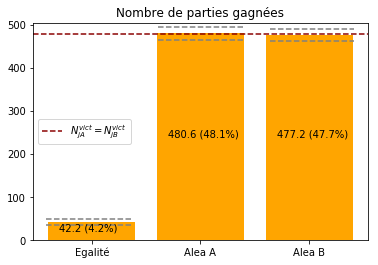

In [135]:
#os.system(myCmd1)
#os.system(myCmd2)

stats_50("data/alea_jAVSjB_2.dat", "Alea A", "Alea B")
#plt.savefig("Graphs2/Histo_alea_jAVSjB.svg", format = 'svg')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.] [  32    1    2   11   12   23   29   63   95  155  231  309  426  562
  717  840 1031 1267 1507 1750 2031 2224 2448 2692 3030 3389 3539 3680
 3885 3915 4022 4162 4244 4075 4158 3889 3835 3752 3388 3247 2981 2729
 2492 2312 1928 1715 1430 1271 1084  820  730  542  417  276  222  155
   96   60   29   19   14    8    1    1]


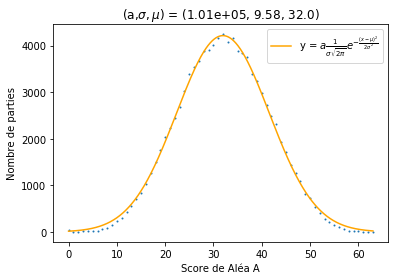

In [136]:
gaussienne("data/alea_jAVSjB_2.dat", "Aléa A")
#plt.savefig("Graphs2/Gaussienne_alea_jAVSjB.svg", format = 'svg')

2) RetourneMax VS Aléatoire

In [ ]:
#os.system(myCmd1)
#os.system(myCmd2)

stats_50("data/retourneMax.dat")
#plt.savefig("Graphs2/Histo_retourneMax.svg", format = 'svg')

In [ ]:
gaussienne("data/retourneMax.dat")
#plt.savefig("Graphs2/Gaussienne_retourneMax.svg", format = 'svg')

3) MinMax VS Aléatoire

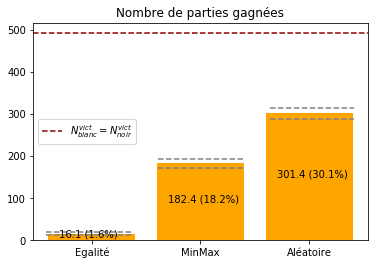

In [71]:
#os.system(myCmd1)
#os.system(myCmd2)

stats_50("data/MinMax_prof1.dat", "MinMax", "Aléatoire")
#plt.savefig("Graphs2/Histo_MinMax_prof1.svg", format = 'svg')

In [ ]:
gaussienne("data/MinMax_prof1.dat")
#plt.savefig("Graphs2/Gaussienne_MinMax_prof1.svg", format = 'svg')